In [1]:
import numpy as np
from bandits import MultiArmedBandit

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

from multiprocessing import Pool

In [2]:
mpl.rcParams['figure.dpi'] = 300

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
mab = MultiArmedBandit(k = 10)

time_horizon = 2000
number_of_experiments = 200

greedy = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0)
metrics2 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.01)
metrics1 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.1)

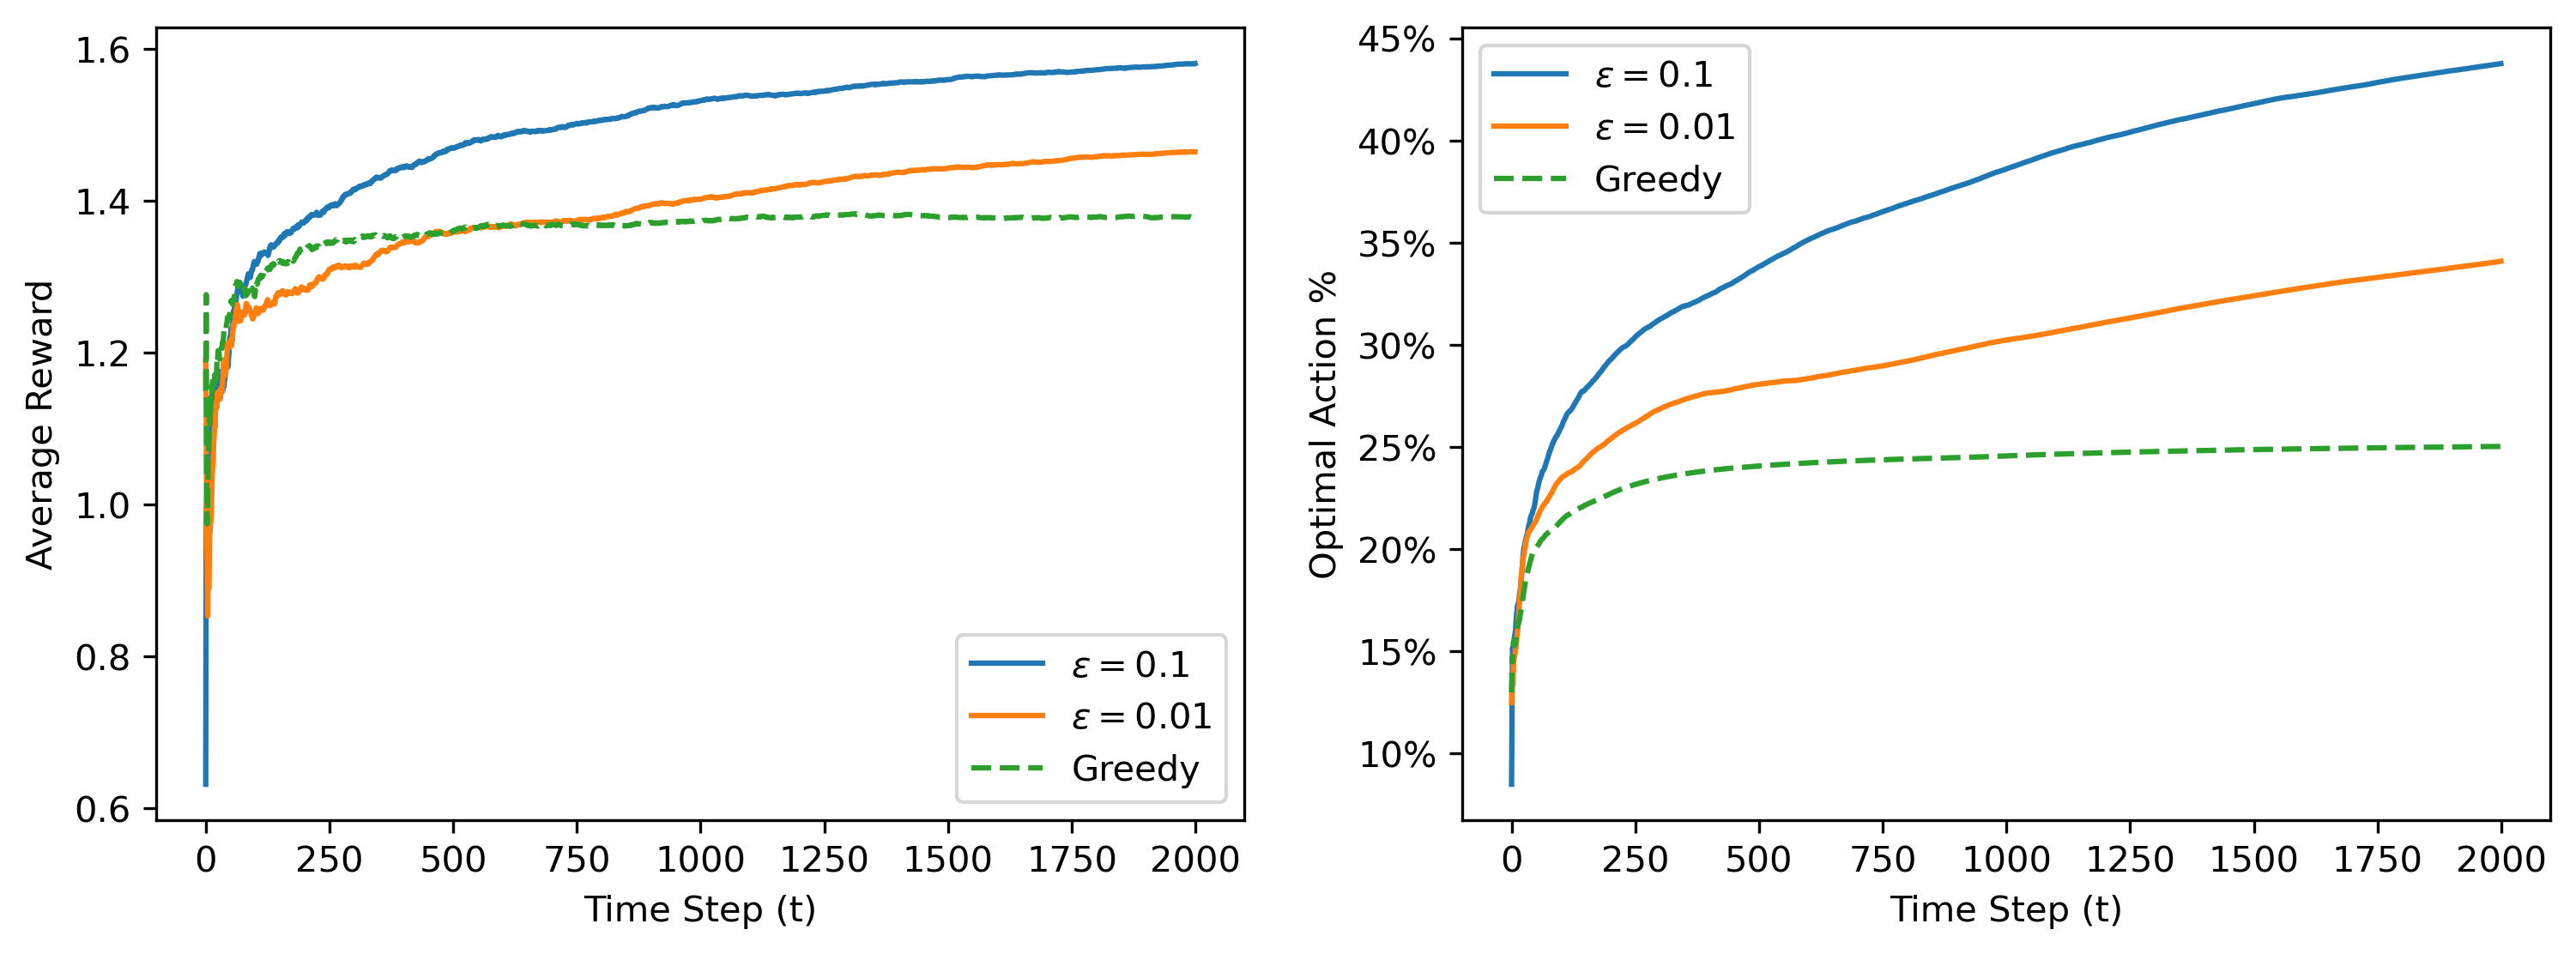

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,4))

ax1.plot(range(time_horizon), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(time_horizon), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(time_horizon), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

ax2.plot(range(time_horizon), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(time_horizon), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(time_horizon), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax1.legend()
ax2.legend()
plt.show()

In [6]:
mab.actual_distribution_parameters

{0: {'loc': -0.13946643150101776, 'scale': 4.960038268120883},
 1: {'loc': 1.6929473736168341, 'scale': 3.1813080552597093},
 2: {'loc': 1.272080993210189, 'scale': 3.5175123466205798},
 3: {'loc': -0.16584265826931663, 'scale': 2.9876627269076708},
 4: {'loc': -0.14807299268268537, 'scale': 4.733584493331068},
 5: {'loc': 1.6486971662875134, 'scale': 4.418494673824439},
 6: {'loc': 1.923420008802041, 'scale': 3.566546749136508},
 7: {'loc': 1.710662079224911, 'scale': 2.3354489856391742},
 8: {'loc': 0.21397972255907033, 'scale': 4.408321011139201},
 9: {'loc': 1.0997733838557728, 'scale': 4.108395907144278}}

In [7]:
mab.estimated_values, np.argmax(mab.estimated_values)

(array([ 0.77538059,  0.33638414,  1.7917376 ,  0.19906886,  0.37263517,
         1.84438991,  1.95995801,  1.75736665, -1.11496956,  0.49523712]),
 6)